# Importing the required libraries : 

In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset : 

In [3]:
df = pd.read_csv(r"Housing.csv")

In [4]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [5]:
# COLUMNS :

df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
# SIZE OF THE DATASET 

df.shape

(545, 13)

In [7]:
# DATA TYPES OF THE COLUMNS OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 40.5+ KB


# Data Processing :

In [8]:
# CHECKING FOR NULL VALUES

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
# REMOVAL OF DUPLICATE VALUE 

counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


**No Null values present in out dataset**

In [10]:
# CONVERTING ALL OUR CATEGORICAL DATA COLUMNS TO NUMERIC FORM

from sklearn.preprocessing import LabelEncoder
categ = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [11]:
# AFTER CONVERTING OUR DATASET LOOKS LIKE THIS ...

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<AxesSubplot:>

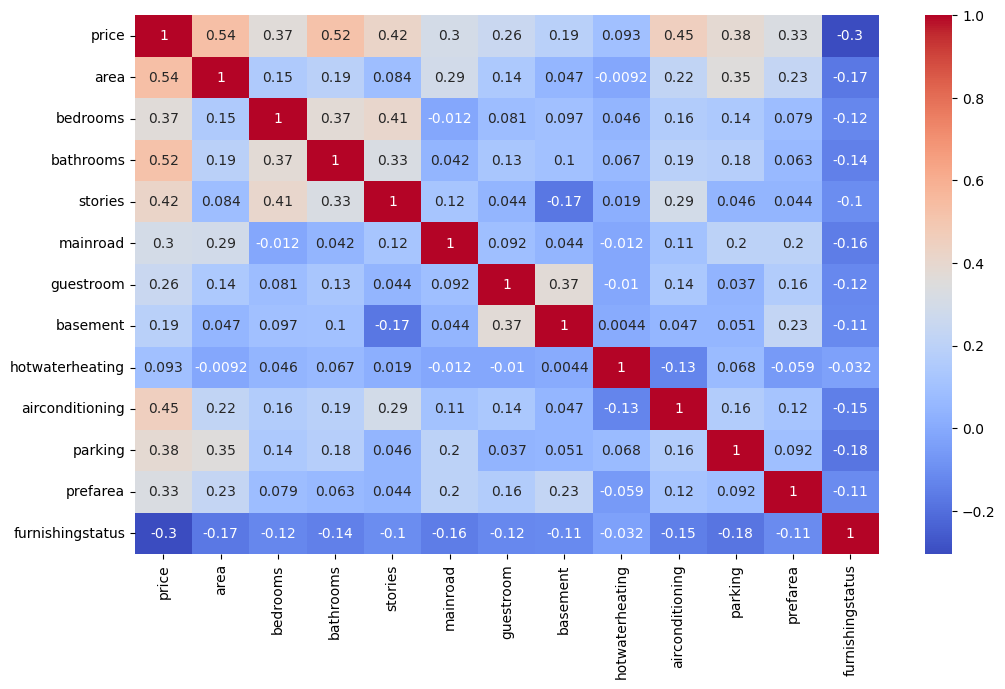

In [12]:
# CORRELATION BETWEEN THE COLUMNS

corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap='coolwarm',annot=True)

# Splitting the Dataset : 

In [13]:
X = df.drop(['price'],axis=1)
y = df['price']

In [14]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [15]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
# LENGTH OF X_train AND X_test

len(X_train),len(X_test)

(381, 164)

# Linear Regression

In [18]:
# IMPORTING THE MODULE

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
# FITTING THE DATA INTO THE MODEL

model.fit(X_train,y_train)

LinearRegression()

In [20]:
# PREDICTING THE OUTCOMES

y_predict = model.predict(X_test)

In [21]:
y_predict

array([5407508.87024418, 7097185.46706854, 3055462.44314053,
       4476945.19636315, 3315983.65663579, 3618373.03255259,
       5758111.46044028, 6466502.43909126, 2830273.16469119,
       2588804.65810567, 9649589.31414054, 2830606.51113843,
       3048137.62898116, 3392779.60203048, 3823232.9673009 ,
       5358170.87034031, 2955016.41578148, 4836054.53230682,
       4603068.47740645, 3551464.60674927, 5625018.82657786,
       5796938.54363456, 2758483.74755246, 4873266.20950521,
       5600804.93370716, 7772078.63540938, 3381536.16270183,
       5370732.06725796, 8352665.9587942 , 3406110.06934798,
       6335677.41367624, 3427228.10570008, 6740746.88053742,
       4205633.93578768, 3624702.80095917, 5797171.46441145,
       5080025.13346592, 4386055.52335342, 3070137.54474224,
       4635050.40917587, 4743419.55702888, 3433682.48420933,
       7076940.4807988 , 4096598.07073102, 3741261.35302813,
       4308416.36745432, 6678982.6364043 , 4092649.04459023,
       3872211.05471678,

# Evaluation

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error
score = r2_score(y_test,y_predict)
mse = mean_absolute_error(y_test,y_predict)

In [26]:
score

0.6435419628959107

In [27]:
mse

925543.548315656

In [30]:
print(f"The predicted house price is : {mse}")

The predicted house price is : 925543.548315656
